<a href="https://colab.research.google.com/github/embrown1292/DS_3001/blob/main/Copy_of_assignment4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Assignment #4: Linear Models and Decision Trees
## Foundations of Machine Learning
## Do Q1 and one other question.
### Advice: Reuse your code and code from lectures, package routine tasks into functions, make plans about how you'll carry out the analysis before jumping into writing code, and work as efficiently as possible

In [168]:
! git clone https://www.github.com/DS3001/assignment4

fatal: destination path 'assignment4' already exists and is not an empty directory.


In [169]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score

**Q1.** This question is a case study for linear models and decision trees. The data are about car prices. In particular, they include:

  - `Price`, `Color`, `Seating_Capacity`
  - `Body_Type`: crossover, hatchback, muv, sedan, suv
  - `Make`, `Make_Year`: The brand of car and year produced
  - `Mileage_Run`: The number of miles on the odometer
  - `Fuel_Type`: Diesel or gasoline/petrol
  - `Transmission`, `Transmission_Type`:  speeds and automatic/manual

  1. Load `cars_hw.csv`. These data were really dirty, and I've already cleaned them a significant amount in terms of missing values and other issues, but some issues remain (e.g. outliers, badly scaled variables that require a log or arcsinh transformation). Clean the data however you think is most appropriate.
  2. Summarize the `Price` variable and create a kernel density plot. Use `.groupby()` and `.describe()` to summarize prices by brand (`Make`). Make a grouped kernel density plot by `Make`. Which car brands are the most expensive? What do prices look like in general?
  3. Split the data into an 80% training set and a 20% testing set.
  4. Let's focus on linear models. Make a model where you regress price on the numeric variables alone; what is the $R^2$ and `RMSE` on the test set? Make a second model where, for the categorical variables, make a model comprised of one-hot encoded regressors/features alone, and regress price on those variables; what is the $R^2$ and `RMSE` on the test set? Which model performs better on the test set? Make a third model that combines all the regressors from the previous two; what is the $R^2$ and `RMSE` on the test set? Does the joint model perform better or worse, and by home much?
  5. Use the `PolynomialFeatures` function from `sklearn` to expand the set of numerical variables you're using, along with the categorical variables. As you increase the degree of the expansion, how do the $R^2$ and `RMSE` change? At what point does $R^2$ go negative on the test set? For your best model with expanded features, what is the $R^2$ and `RMSE`? How does it compare to your best model from part 3?
  6. For your best model so far, determine the predicted values for the test data and plot them against the true values. Do the predicted values and true values roughly line up along the diagonal, or not? Compute the residuals/errors for the test data and create a kernel density plot. Do the residuals look roughly bell-shaped around zero? Evaluate the strengths and weaknesses of your model.
  7. Now, let's use a regression tree. Construct an appropriate matrix of regressors/features, and fit a tree to the data. Vary the maximum depth of the decision tree using the `max_depth` option (i.e. `tree.DecisionTreeRegressor(max_depth=D)`), and compute the $R^2$ and `RMSE` on the test set of a variety of depths. What depth tree gives the best results?
  8. For your best tree, determine the predicted values for the test data, and plot them against the true values. Do the predicted values and true values line up along the diagonal, or not? Compute the residuals/errors for the test data and create a kernel density plot. Do the residuals look roughly bell-shaped around zero?
  12. Which model --- linear model or classification and regression tree --- has better performance on the test set?

In [170]:
pwd

'/content'

In [171]:
df = pd.read_csv('./assignment4/data/cars_hw.csv')

In [172]:
df.head()

,Unnamed: 0,Make,Make_Year,Color,Body_Type,Mileage_Run,No_of_Owners,Seating_Capacity,Fuel_Type,Transmission,Transmission_Type,Price
0,1,Volkswagen,2017,silver,sedan,44611,1st,5,diesel,7-Speed,Automatic,657000
1,2,Hyundai,2016,red,crossover,20305,1st,5,petrol,5-Speed,Manual,682000
2,3,Honda,2019,white,suv,29540,2nd,5,petrol,5-Speed,Manual,793000
3,4,Renault,2017,bronze,hatchback,35680,1st,5,petrol,5-Speed,Manual,414000
4,5,Hyundai,2017,orange,hatchback,25126,1st,5,petrol,5-Speed,Manual,515000


In [173]:
for col in df:
  print(col)

Unnamed: 0
Make
Make_Year
Color
Body_Type
Mileage_Run
No_of_Owners
Seating_Capacity
Fuel_Type
Transmission
Transmission_Type
Price


In [174]:
df = df.drop(['Unnamed: 0'], axis=1)

In [175]:
df['Make'].unique()

array(['Volkswagen', 'Hyundai', 'Honda', 'Renault', 'Tata', 'Chevrolet',
       'Maruti Suzuki', 'Toyota', 'Mahindra', 'Ford', 'Nissan', 'Jeep',
       'MG Motors', 'Kia', 'Skoda', 'Datsun'], dtype=object)

In [176]:
df.isna().sum() # No nas


Make                 0
Make_Year            0
Color                0
Body_Type            0
Mileage_Run          0
No_of_Owners         0
Seating_Capacity     0
Fuel_Type            0
Transmission         0
Transmission_Type    0
Price                0
dtype: int64

In [177]:
df['No_of_Owners'].unique()
owners_map = {'1st': 1, '2nd': 2, '3rd': 3}
df['No_of_Owners'] = df['No_of_Owners'].replace(owners_map)
df.head()

,Make,Make_Year,Color,Body_Type,Mileage_Run,No_of_Owners,Seating_Capacity,Fuel_Type,Transmission,Transmission_Type,Price
0,Volkswagen,2017,silver,sedan,44611,1,5,diesel,7-Speed,Automatic,657000
1,Hyundai,2016,red,crossover,20305,1,5,petrol,5-Speed,Manual,682000
2,Honda,2019,white,suv,29540,2,5,petrol,5-Speed,Manual,793000
3,Renault,2017,bronze,hatchback,35680,1,5,petrol,5-Speed,Manual,414000
4,Hyundai,2017,orange,hatchback,25126,1,5,petrol,5-Speed,Manual,515000


<Axes: >

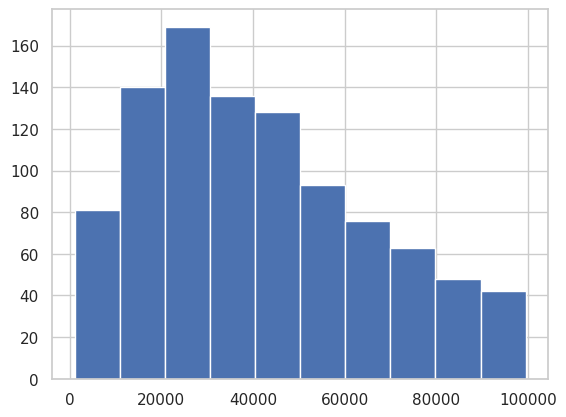

In [178]:
df['Mileage_Run'].hist() # Looks good

<Axes: >

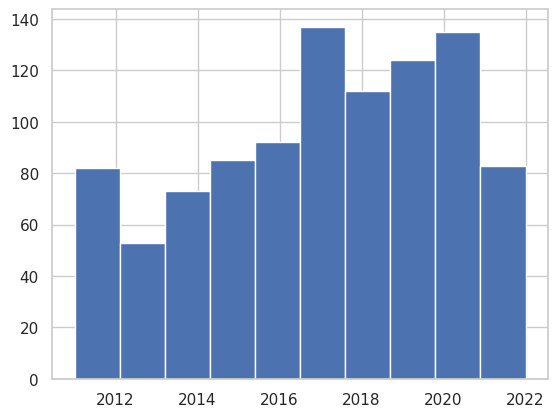

In [179]:
df['Make_Year'].hist() # Looks good

In [180]:
# df['Transmission_Type'].unique()
# ddf = pd.get_dummies(df['Transmission_Type'])
# ddf.head()

In [181]:
type(df['Price'][2])

numpy.int64

In [182]:
df['Price'] = df['Price'].div(10) #I think the prices are 10x higher than what they should be,
# and will assume that the actual price is the (number recorded)/10.

<Axes: >

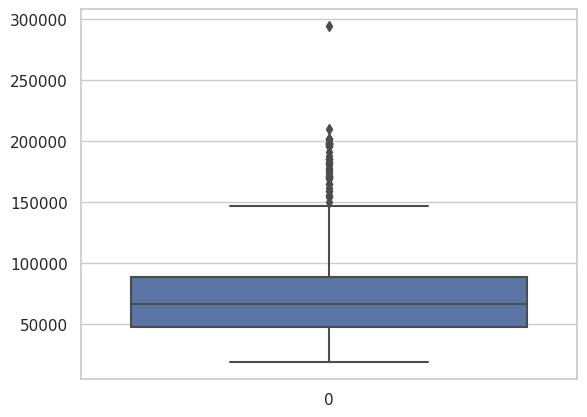

In [183]:
x = df['Price']
sns.boxplot(x)
# Let's windsorize this :-)

<ipython-input-184-e43c9b9146bf>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x_windsor[ x < lower_whisker ] = lower_whisker
<ipython-input-184-e43c9b9146bf>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x_windsor[ x > upper_whisker ] = upper_whisker


<Axes: >

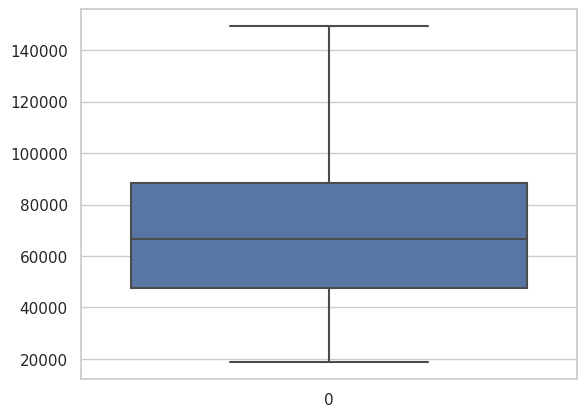

In [184]:
def windsorize(x):
    # Compute IQR and 1st,3rd quantiles
    pct25, pct75 = np.percentile(x,[25,75])
    iqr = pct75 - pct25
    # Compute whiskers:
    lower_whisker = pct25 - iqr*1.5
    upper_whisker = pct75 + iqr*1.5
    # Windsorize x:
    x_windsor = x
    x_windsor[ x < lower_whisker ] = lower_whisker
    x_windsor[ x > upper_whisker ] = upper_whisker
    return(x_windsor)

sns.boxplot( windsorize(x))
# It's windsorized!

In [185]:
df['Transmission'].unique() # We'll leave this

array(['7-Speed', '5-Speed', '6-Speed', 'CVT', '4-Speed'], dtype=object)

<Axes: >

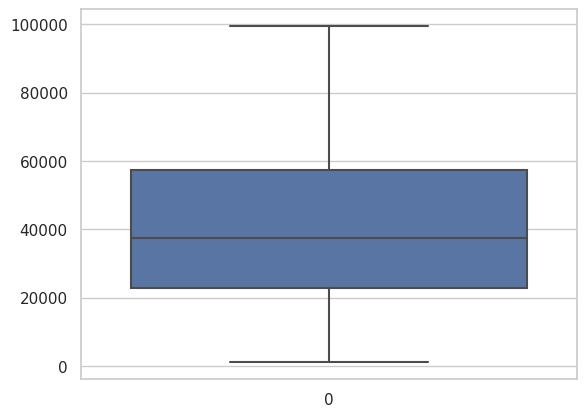

In [186]:
x = df['Mileage_Run']
sns.boxplot(x) # no outliers, yeah

2. Summarize the Price variable and create a kernel density plot. Use .groupby() and .describe() to summarize prices by brand (Make). Make a grouped kernel density plot by Make. Which car brands are the most expensive? What do prices look like in general?


<Axes: ylabel='Density'>

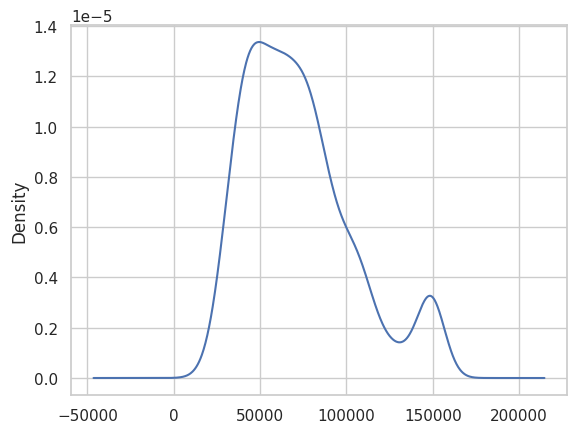

In [187]:
var = "Price"
df[var].plot.density()

In [188]:
df[var].groupby(df["Make"]).describe()

,count,mean,std,min,25%,50%,75%,max
Make,,,,,,,,
Chevrolet,6.0,45350.000000,24660.636650,26700.0,28850.000,34550.0,53750.00,89200.0
Datsun,3.0,28966.666667,1050.396750,27900.0,28450.000,29000.0,29500.00,30000.0
Ford,52.0,72117.307692,14092.769960,29000.0,63500.000,70750.0,78700.00,106600.0
Honda,73.0,79838.184932,26489.330587,31600.0,58100.000,78500.0,91500.00,149387.5
Hyundai,305.0,69107.827869,27643.769759,24800.0,48500.000,63800.0,83700.00,149387.5
Jeep,4.0,144290.625000,10193.750000,129000.0,144290.625,149387.5,149387.50,149387.5
Kia,8.0,147826.562500,4414.997965,136900.0,149387.500,149387.5,149387.50,149387.5
MG Motors,35.0,149387.500000,0.000000,149387.5,149387.500,149387.5,149387.50,149387.5
Mahindra,18.0,110016.666667,17554.930596,79600.0,103700.000,109450.0,115700.00,146500.0


<ipython-input-189-fcf25c98f4e6>:2: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  ax = sns.kdeplot(data=df, x="Price", hue="Make", cut=0, fill=True, common_norm=False, alpha=1)


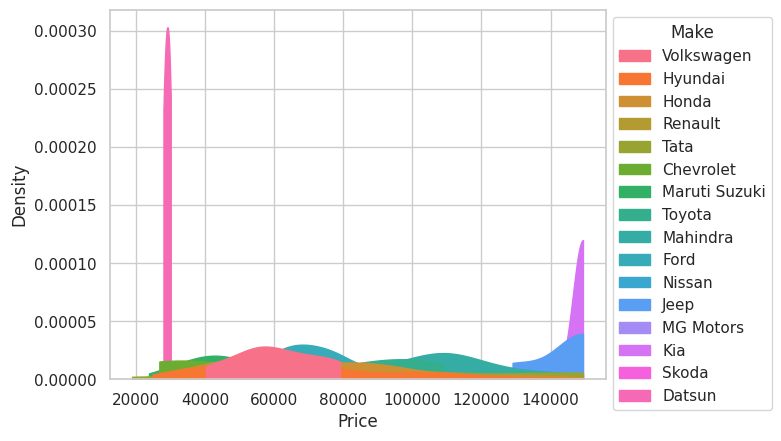

In [189]:
sns.set(style='whitegrid') # Seaborn Documentation
ax = sns.kdeplot(data=df, x="Price", hue="Make", cut=0, fill=True, common_norm=False, alpha=1)
sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1))
plt.show()

The most expensive car brands are Kias and Jeeps. In general, most car prices here are in around 40 to 120k.




3. Split the data into an 80% training set and a 20% testing set.

In [190]:
# Numerical and Categorical variables for regression model.
num_var = [
    'Make_Year', 'Mileage_Run', 'No_of_Owners', 'Seating_Capacity'
]
cat_var = [
    'Make', 'Color', 'Body_Type', 'Fuel_Type',
    'Fuel_Type', 'Transmission', 'Transmission_Type'
]

In [191]:
#Split the sample into ~80% for training and ~20% for evaluation.
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

X = df
y = df['Price']

#X_train, X_test, y_train, y_test = train_test_split(X[num_var],y,test_size=.2,random_state=100)
X_train, X_test, y_train, y_test = train_test_split(X[num_var],y,test_size=.2,random_state=100)
print(len(X_train))  # Successfully split data 80/20%
print(len(X_test))
TSS = np.sum( (y_test - y_train.mean())**2 )

N_test = len(y_test)
X_train.head() # Looking at the data. Looks good

780
196


,Make_Year,Mileage_Run,No_of_Owners,Seating_Capacity
103,2013,72356,1,5
100,2017,28831,1,5
518,2016,56762,1,5
630,2020,30234,1,5
436,2016,36822,1,5


4. Let's focus on linear models. Make a model where you regress price on the numeric variables alone; what is the  R2  and RMSE on the test set? Make a second model where, for the categorical variables, make a model comprised of one-hot encoded regressors/features alone, and regress price on those variables; what is the  R2  and RMSE on the test set? Which model performs better on the test set? Make a third model that combines all the regressors from the previous two; what is the  R2  and RMSE on the test set? Does the joint model perform better or worse, and by home much?

In [192]:
# Linear regression on numerical variables

from sklearn.linear_model import LinearRegression # Import linear regression model

reg = LinearRegression().fit(X_train, y_train) # Fit the linear model
print(reg.intercept_) # Intercept value
print(reg.coef_) # Regression coefficients
print(reg.score(X_test, y_test)) # R squared measure

y_hat = reg.predict(X_test)
SSE_lm = np.sum( (y_test-y_hat)**2 )
MSE_lm = SSE_lm/N_test
RMSE_lm = (SSE_lm/N_test)**(1/2)
R2_lm = 1 - SSE_lm/TSS
print(RMSE_lm)

-14945368.956894975
[ 7.42486793e+03  2.79905801e-01 -2.20021786e+03  6.38785596e+03]
0.359126391944671
24923.919613755057


Using the numerical variables, the sklearn linear model resulted in an R^2 value of 0.359 which is not great. This suggests that this linear model is either underfitting or is not a great choice.


In [193]:
X2 = df[cat_var]
y2 = df['Price']

X2_onehot = pd.get_dummies(X2, columns=cat_var)
X2_onehot.head()  # Looks good

,Make_Chevrolet,Make_Datsun,Make_Ford,Make_Honda,Make_Hyundai,Make_Jeep,Make_Kia,Make_MG Motors,Make_Mahindra,Make_Maruti Suzuki,...,Fuel_Type_diesel,Fuel_Type_petrol,Fuel_Type_petrol+cng,Transmission_4-Speed,Transmission_5-Speed,Transmission_6-Speed,Transmission_7-Speed,Transmission_CVT,Transmission_Type_Automatic,Transmission_Type_Manual
0,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,1,0,1,0
1,0,0,0,0,1,0,0,0,0,0,...,0,1,0,0,1,0,0,0,0,1
2,0,0,0,1,0,0,0,0,0,0,...,0,1,0,0,1,0,0,0,0,1
3,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,1,0,0,0,0,1
4,0,0,0,0,1,0,0,0,0,0,...,0,1,0,0,1,0,0,0,0,1


In [194]:
X2_train, X2_test, y2_train, y2_test = train_test_split(X2_onehot,y2,test_size=.2,random_state=100)   # Same linear regression as before
X2_train.head()

# Linear regression on categorical variables

reg = LinearRegression().fit(X2_train, y2_train) # Fit the linear model
print(reg.intercept_) # Intercept value
print(reg.coef_) # Regression coefficients
print(reg.score(X2_test, y2_test)) # R squared measure

N_test = len(y2_test)
y_hat = reg.predict(X2_test)
SSE_lm = np.sum( (y_test-y_hat)**2 )
MSE_lm = SSE_lm/N_test
RMSE_lm = (SSE_lm/N_test)**(1/2)
R2_lm = 1 - SSE_lm/TSS
print(RMSE_lm)

-1.2997308875550979e+18
[-3.35359173e+04 -2.29551998e+04 -6.37755412e+03  5.82128635e+03
  1.49527051e+03  1.96714126e+04  4.25169773e+04  5.22976303e+04
  1.01893803e+04 -1.62475068e+03  8.25674415e+03 -3.69039370e+03
 -1.08747814e+04  1.83876361e+04  1.14622157e+04 -8.48960334e+03
  2.28224397e+16  2.28224397e+16  2.28224397e+16  2.28224397e+16
  2.28224397e+16  2.28224397e+16  2.28224397e+16  2.28224397e+16
  2.28224397e+16  2.28224397e+16  2.28224397e+16  2.28224397e+16
  2.28224397e+16  2.28224397e+16  2.28224397e+16 -8.80898117e+16
 -8.80898117e+16 -8.80898117e+16 -8.80898117e+16 -8.80898117e+16
  2.10978552e+17  2.28414383e+17  2.24456958e+17  2.49271379e+17
  2.11768422e+17  2.26813245e+17  2.24605812e+17  2.25767803e+17
  2.26893114e+17  2.13404062e+17  2.32309196e+17  2.20096487e+17
  6.07363586e+15  6.07363586e+15  6.07363586e+15  6.07363586e+15
  6.07363586e+15  4.60664820e+17  4.60664820e+17]
0.7234362653475739
16372.981227093467


The R^2 value is 0.723 for this regression which is much better than the one for numerical variables.

In [195]:
df_encoded = pd.get_dummies(df, columns=cat_var)

y = df['Price']
X3_train, X3_test, y3_train, y3_test = train_test_split(df_encoded,y,test_size=.2,random_state=100)   # Same linear regression as before

reg = LinearRegression().fit(X3_train, y3_train) # Fit the linear model
print(reg.intercept_) # Intercept value
print(reg.coef_) # Regression coefficients
print(reg.score(X3_test, y3_test)) # R squared measure

N_test = len(y3_test)

y_hat = reg.predict(X3_test)
SSE_lm = np.sum( (y_test-y_hat)**2 )
MSE_lm = SSE_lm/N_test
RMSE_lm = (SSE_lm/N_test)**(1/2)
R2_lm = 1 - SSE_lm/TSS
print(RMSE_lm)

-1.1903466656804085e-08
[ 5.91796711e-12  6.66133815e-16 -2.02159400e-11  5.33474322e-12
  1.00000000e+00  1.79777138e-11  2.92796812e-11 -6.72200078e-12
  7.16726318e-12 -1.25329260e-11  3.91619025e-11 -8.94173923e-11
  5.12881284e-13 -1.83720963e-12 -3.72811703e-12 -3.76449959e-11
 -1.84235397e-11  7.50805199e-11 -2.23264458e-12 -1.00435729e-11
  1.34024369e-11  1.77897040e-11  5.57463509e-12  2.81095028e-13
 -2.85932188e-12  1.21132684e-11 -4.67275601e-11 -8.90605226e-11
  3.55065197e-12  7.01154375e-11  2.06838236e-12  1.68145189e-11
  2.94266764e-12  4.95323876e-12  8.63959526e-12 -6.19579034e-12
  1.46085289e-12  2.08148908e-12  5.36929329e-12 -7.19273476e-12
 -1.71890043e-12 -2.59354493e-12 -2.32202312e-12  4.91556808e-12
 -2.59354493e-12 -2.32202313e-12  4.91556808e-12  2.86463417e-12
 -2.15018021e-12 -6.76691474e-13  4.17264087e-14 -7.94888891e-14
 -6.10901806e-13  6.10901799e-13]
1.0
2.9085263417869953e-11


The R^2 value is 1.0 which suggests that the model is overfit. This model does worse than just using the categorical or numeric variables alone.

5. Use the PolynomialFeatures function from sklearn to expand the set of numerical variables you're using, along with the categorical variables. As you increase the degree of the expansion, how do the  R2  and RMSE change? At what point does  R2  go negative on the test set? For your best model with expanded features, what is the  R2  and RMSE? How does it compare to your best model from part 3?

0.3959425702487466


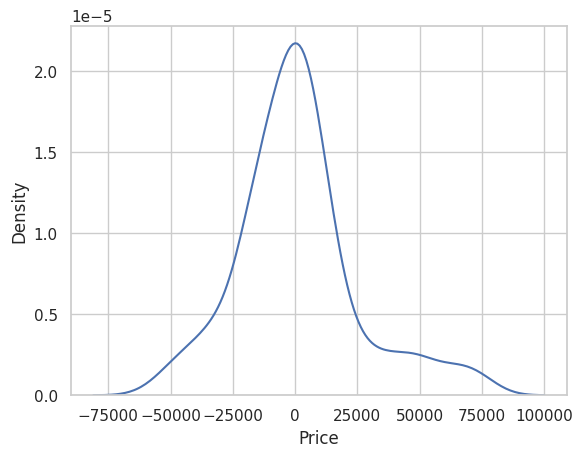

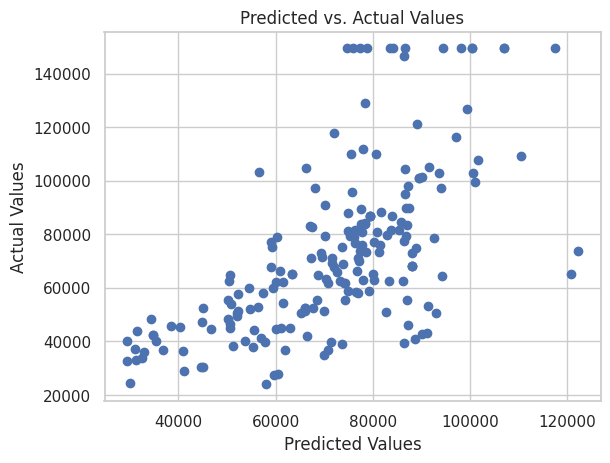

24197.43118711641
0.3962609692076098


In [196]:
## Linear Model code from class:
from sklearn.linear_model import LinearRegression # Import linear regression model
from sklearn.preprocessing import PolynomialFeatures

# Expand features
expander = PolynomialFeatures(degree=3,include_bias=False) # Create the expander
#
Z_train = expander.fit_transform(X_train) # Pass the df into the expander to get powers/interactions of x and y
names = expander.get_feature_names_out() # Get the names of these variables
X_train_lm = pd.DataFrame(data=Z_train, columns = names) # Create a new, expanded dataframe
#
Z_test = expander.fit_transform(X_test) # Pass the df into the expander to get powers/interactions of x and y
names = expander.get_feature_names_out() # Get the names of these variables
X_test_lm = pd.DataFrame(data=Z_test, columns = names) # Create a new, expanded dataframe

# Fit the model and get the R2 measure:
reg = LinearRegression().fit(X_train_lm, y_train) # Fit the linear model
print(reg.score(X_test_lm, y_test)) # R squared measure

# Predicted values:
y_hat_lm = reg.predict(X_test_lm)
residuals_lm = y_test - y_hat_lm


## Residual plot:
sns.kdeplot(residuals_lm)
plt.show()

## True versus predicted plot:
plt.scatter(x=y_hat_lm,y=y_test)
plt.title('Predicted vs. Actual Values')
plt.xlabel('Predicted Values')
plt.ylabel('Actual Values')
plt.show()

## Metrics:
SSE_lm = np.sum( (y_test-y_hat_lm)**2 )
MSE_lm = SSE_lm/N_test
RMSE_lm = (SSE_lm/N_test)**(1/2)
R2_lm = 1 - SSE_lm/TSS

print(RMSE_lm)
print(R2_lm)

As you increase the degree of the expansion, how do the R2 and RMSE change? At what point does R2 go negative on the test set? For your best model with expanded features, what is the R2 and RMSE? How does it compare to your best model from part 3?



w/ degree at 2: R^2 = 0.405, RMSE = 24013.43

w/ degree at 3: R^2 = 0.396, RMSE = 24197.43

w/ degree at 4: R^2 = 0.368, RMSE = 24747.58

w/ degree at 5: R^2 = 0.365, RMSE = 24807.17
...
w/ degree at 7: R^2 = -0.028, RSME = 31579.58

As you decrease the degree of expansion, there is a slight increase of the R^2, and the RMSE drops by a couple hundred. R^2 goes negative at the degree of 7. The best model with expanded features is when the degree = 2, with the highest R^2 is 0.41. It compares poorly with the best model in part 3 (the categorical model) where R^2 value is 0.723.

6. For your best model so far, determine the predicted values for the test data and plot them against the true values. Do the predicted values and true values roughly line up along the diagonal, or not? Compute the residuals/errors for the test data and create a kernel density plot. Do the residuals look roughly bell-shaped around zero? Evaluate the strengths and weaknesses of your model.

-1.2997308875550979e+18
[-3.35359173e+04 -2.29551998e+04 -6.37755412e+03  5.82128635e+03
  1.49527051e+03  1.96714126e+04  4.25169773e+04  5.22976303e+04
  1.01893803e+04 -1.62475068e+03  8.25674415e+03 -3.69039370e+03
 -1.08747814e+04  1.83876361e+04  1.14622157e+04 -8.48960334e+03
  2.28224397e+16  2.28224397e+16  2.28224397e+16  2.28224397e+16
  2.28224397e+16  2.28224397e+16  2.28224397e+16  2.28224397e+16
  2.28224397e+16  2.28224397e+16  2.28224397e+16  2.28224397e+16
  2.28224397e+16  2.28224397e+16  2.28224397e+16 -8.80898117e+16
 -8.80898117e+16 -8.80898117e+16 -8.80898117e+16 -8.80898117e+16
  2.10978552e+17  2.28414383e+17  2.24456958e+17  2.49271379e+17
  2.11768422e+17  2.26813245e+17  2.24605812e+17  2.25767803e+17
  2.26893114e+17  2.13404062e+17  2.32309196e+17  2.20096487e+17
  6.07363586e+15  6.07363586e+15  6.07363586e+15  6.07363586e+15
  6.07363586e+15  4.60664820e+17  4.60664820e+17]
0.7234362653475739
16372.981227093467


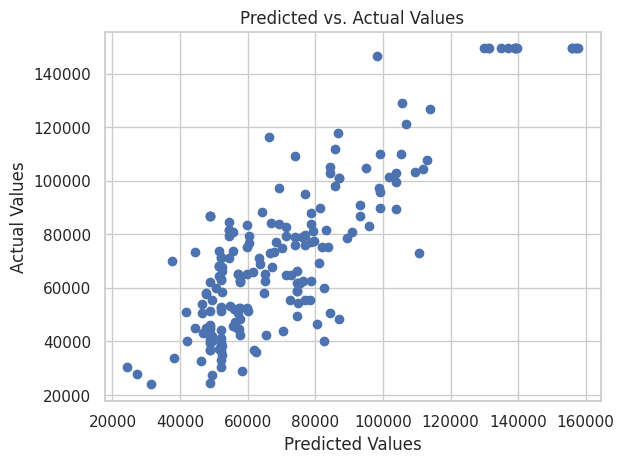

In [197]:
X2_train, X2_test, y2_train, y2_test = train_test_split(X2_onehot,y2,test_size=.2,random_state=100)
X2_train.head()

# Linear regression on categorical variables from above

reg = LinearRegression().fit(X2_train, y2_train) # Fit the linear model
print(reg.intercept_) # Intercept value
print(reg.coef_) # Regression coefficients
print(reg.score(X2_test, y2_test)) # R squared measure

N_test = len(y2_test)
y_hat = reg.predict(X2_test)
SSE_lm = np.sum( (y_test-y_hat)**2 )
MSE_lm = SSE_lm/N_test
RMSE_lm = (SSE_lm/N_test)**(1/2)
R2_lm = 1 - SSE_lm/TSS
print(RMSE_lm)

## True versus predicted plot:
plt.scatter(x=y_hat,y=y2_test)
plt.title('Predicted vs. Actual Values')
plt.xlabel('Predicted Values')
plt.ylabel('Actual Values')
plt.show()

## Metrics:
SSE_lm = np.sum( (y_test-y_hat_lm)**2 )
MSE_lm = SSE_lm/N_test
RMSE_lm = (SSE_lm/N_test)**(1/2)
R2_lm = 1 - SSE_lm/TSS

The model here is definitely not the best for actually predicting the values, with a lot of the values outside of the 60-80k range being poor at predicting. Most notably, once you get out of the 120k range, it doesn't do the best in predicting those higher values. They slightly line up along the diagonal but are skewed.

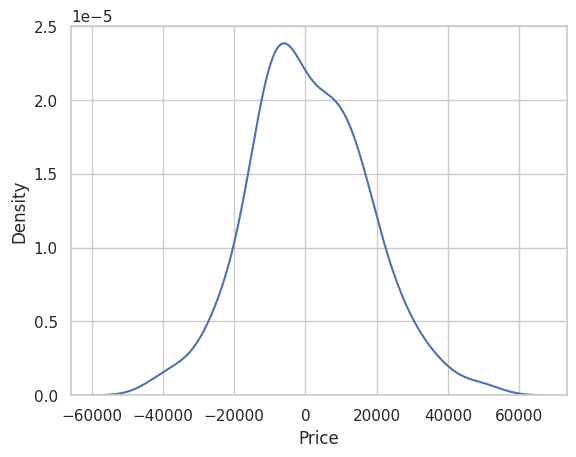

In [198]:
residuals_lm = y2_test - y_hat

## Residual plot:
sns.kdeplot(residuals_lm)
plt.show()

The residuals look roughly bell-shaped around zero, but there is a slight skew to the right that's closer to the negative values. The model is decently okay at predicting values of the price of the car, but it has a really high RMSE and a decent but not great R^2 value. Overall, I think it definitely should not be used to predict the price of a car.

7. Now, let's use a regression tree. Construct an appropriate matrix of regressors/features, and fit a tree to the data. Vary the maximum depth of the decision tree using the max_depth option (i.e. tree.DecisionTreeRegressor(max_depth=D)), and compute the  R2  and RMSE on the test set of a variety of depths. What depth tree gives the best results?

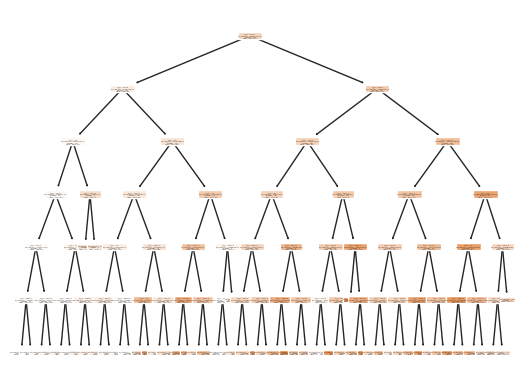

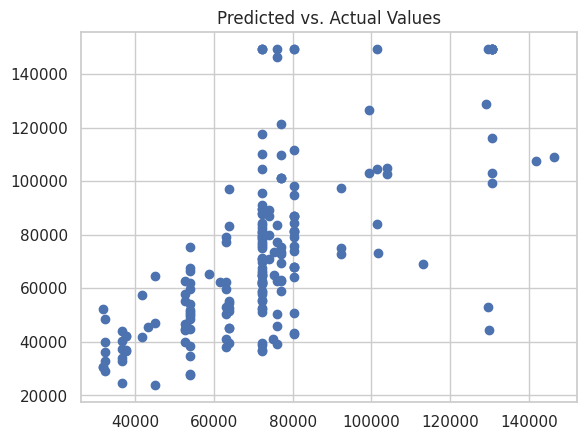

0.4356574996541145


In [199]:
## Decision Trees sample code:
from sklearn import tree
N_test = len(y_test)
model = tree.DecisionTreeRegressor(max_depth=6) # Fit the classifier
cart = model.fit(X_train, y_train)
tree.plot_tree(cart,filled=True)
plt.show()

## Make Predictions on the Test Set
y_hat_cart = cart.predict(X_test)
residuals_cart = y_test - y_hat_cart


## True versus predicted plot:
plt.scatter(x=y_hat_cart,y=y_test)
plt.title('Predicted vs. Actual Values')
plt.show()


## Metrics:
SSE_cart = np.sum( (y_test-y_hat_cart)**2 )
MSE_cart = (1/N_test)*np.sum( (y_test-y_hat_cart)**2 )
RMSE_cart = (SSE_cart/N_test)**(1/2)
R2_cart = 1 - SSE_cart/TSS
print(R2_cart)

In [200]:
print(RMSE_cart)

23394.62110693722


max_depth=10: R^2 = 0.308, RSME = 25892.97

max_depth=6: R^2 = 0.44, RSME = 23394.62

max_depth=5: R^2 = 0.43, RMSE = 23510.39

max_depth=3: R^2 = 0.397, RMSE = 23510.39

max_depth=2: R^2 = 0.313, RMSE = 23510.40

The best depth tree is 6, with the a still very poor R^2 value of 0.44.

8. For your best tree, determine the predicted values for the test data, and plot them against the true values. Do the predicted values and true values line up along the diagonal, or not? Compute the residuals/errors for the test data and create a kernel density plot. Do the residuals look roughly bell-shaped around zero?

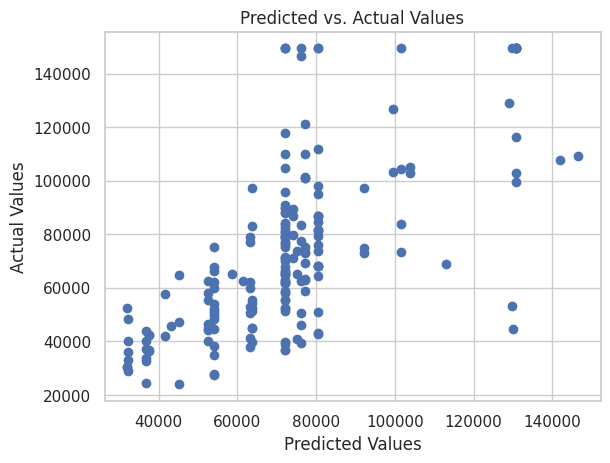

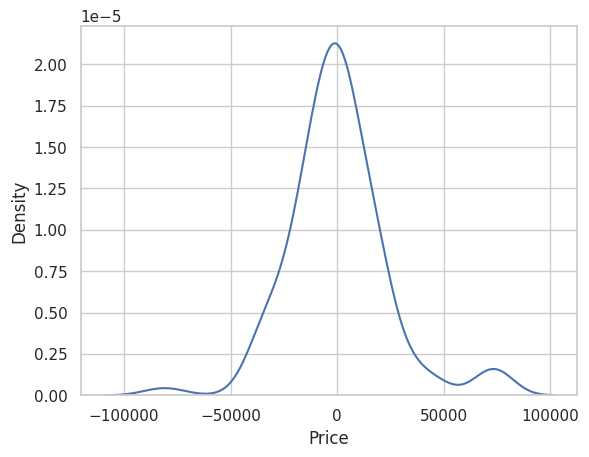

In [201]:
# max_depth = 6
##

## Decision Trees sample code:
from sklearn import tree
N_test = len(y_test)
model = tree.DecisionTreeRegressor(max_depth=6) # Fit the classifier
cart = model.fit(X_train, y_train)
#tree.plot_tree(cart,filled=True)
#plt.show()

## Make Predictions on the Test Set
y_hat_cart = cart.predict(X_test)
residuals_cart = y_test - y_hat_cart


## True versus predicted plot:
plt.scatter(x=y_hat_cart,y=y_test)
plt.title('Predicted vs. Actual Values')
plt.xlabel('Predicted Values')
plt.ylabel('Actual Values')
plt.show()

## Residual plot:
sns.kdeplot(residuals_cart)
plt.show()

The residual graph shows that the predicted points do not fall along a diagonal very well.
In the kernel density plot, the residuals do look like a bell curve around the zero, and have some bumps in the 50k to 75k as well as around the -75k.

9. Which model --- linear model or classification and regression tree --- has better performance on the test set?

The linear model had a better performance on the test set compared to the classification and regression tree. The R^2 value for the categorical variables model was the highest of the models looked at, at .72, whereas the best R^2 value for the CART model was .44 when the maximum depth was at 6. Moreover, the linear model was better able to predict the actual values, with the "predicted vs. actual values" depicting a stronger diagonal relationship than that of the CART model. Overall though, these models were quite poor in predicting and was probably underfit.

**Q2.** The is a question about regression using decision trees and linear models. The data include wages at data science-y jobs, including

  - `Rating`: Company worker happiness score
  - `Size`: Number of employees
  - `Sector`: Part of the economy
  - `avg_salary`: Average wage
  - `job_state`: Location of work

  1. Load the `wages_hw.csv` file. Split the sample into an ~80% training set and a ~20% test set. Do any necessary cleaning, including outliers and missings.
  2. Use a linear model to regress `avg_salary` on `Sector`. Which sectors have the highest predicted wages? What is the $R^2$ and `RMSE` on the test set?
  3. Make a scatterplot of `avg_salary` and `Rating`. Is there an obvious visual relationship between the two variables? Regress `avg_salary` on `Rating` as a numeric variable: Do higher ratings predict higher or lower wages? Convert `Rating` to a one-hot encoded variable, with a category for each rating. Run a regression of `avg_salary` on the categorical version. How do your results change? Explain. Which version has a higher $R^2$ and lower `RMSE`?
  4. Now interact `Sector` with the categorical version of `Rating`, so your regressors are a (Sector, Rating) pair; this is a programming puzzle you'll have to think about, but using the `.PolynomialFeatures()` function on the one-hot encoded categorical variables is one option, and another is pre-processing a new variable that interacts `Sector` and `Rating` and then one-hot encoding the result. Regress `avg_salary` on the (Sector, Rating) pairs. How does the $R^2$ and `RMSE` on the test set compare to part 2? Interpret the coefficients; which sector-rating pairs have the highest wages?
  5. Run a linear regression of `avg_salary` on all the variables. What is the $R^2$ on the test set? How does it compare to your simpler models in 2--4?
  6. Build a decision tree by regressing `avg_salary` on `Sector`, `Rating`, and the (Sector, Rating) pairs. What are the $R^2$ and `RMSE` of your models on the test set? How do your answers compare to parts 2, 3, and 4?
  7. Build a decision tree by regressing `avg_salary` on all the other variables. What is the $R^2$ and `RMSE` on the test set?
  8. Build a linear regression or decision tree using the available variables based on your own judgment. What degrees of freedom are you giving the model to predict variation in wages across company and location attributes? What is the $R^2$ and `RMSE` of your model? How does it compare to the previous ones in the question? Why does yours perform better or worse on the test set?

In [202]:
ndf = pd.read_csv('./assignment4/data/wages_hw.csv')

In [203]:
ndf.head()


,Unnamed: 0,Rating,Size,Sector,avg_salary,job_state
0,1,3.8,501 to 1000 employees,Aerospace & Defense,72.0,NM
1,2,3.4,10000+ employees,Health Care,87.5,MD
2,3,4.8,501 to 1000 employees,Business Services,85.0,FL
3,4,3.8,1001 to 5000 employees,"Oil, Gas, Energy & Utilities",76.5,WA
4,5,2.9,51 to 200 employees,Business Services,114.5,NY


In [204]:
for col in ndf:
  print(col)

Unnamed: 0
Rating
Size
Sector
avg_salary
job_state


Any missings?

In [205]:
ndf = ndf.drop('Unnamed: 0', axis=1)

In [206]:
ndf['Size'].unique()

array(['501 to 1000 employees', '10000+ employees',
       '1001 to 5000 employees', '51 to 200 employees',
       '201 to 500 employees', '5001 to 10000 employees',
       '1 to 50 employees', 'Unknown'], dtype=object)

In [207]:
ndf['Sector'].unique()
ndf = ndf[ndf['Sector'] != '-1']

In [208]:
ndf['job_state'].unique() #looks good, notice missing states so might think about
# that when looking at model's external validity

array([' NM', ' MD', ' FL', ' WA', ' NY', ' TX', ' CA', ' VA', ' MA',
       ' NJ', ' CO', ' IL', ' KY', ' OR', ' CT', ' MI', ' DC', ' OH',
       ' AL', ' MO', ' PA', ' GA', ' IN', ' LA', ' WI', ' NC', ' AZ',
       ' NE', ' MN', ' Los Angeles', ' UT', ' TN', ' DE', ' ID', ' RI',
       ' IA', ' SC', ' KS'], dtype=object)

In [209]:
ndf.isna().sum() #No Nans

Rating        0
Size          0
Sector        0
avg_salary    0
job_state     0
dtype: int64

Any outliers?

In [210]:
def windsorize(x):
    # Compute IQR and 1st,3rd quantiles
    pct25, pct75 = np.percentile(x,[25,75])
    iqr = pct75 - pct25
    # Compute whiskers:
    lower_whisker = pct25 - iqr*1.5
    upper_whisker = pct75 + iqr*1.5
    # Windsorize x:
    x_windsor = x
    x_windsor[ x < lower_whisker ] = lower_whisker
    x_windsor[ x > upper_whisker ] = upper_whisker
    return(x_windsor)

<ipython-input-210-309d8855328a>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x_windsor[ x > upper_whisker ] = upper_whisker


<Axes: >

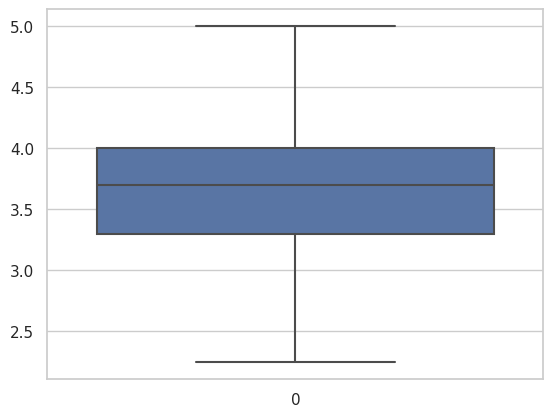

In [211]:
ndf['Rating'] = windsorize(ndf['Rating'])
sns.boxplot(ndf['Rating'])

<ipython-input-210-309d8855328a>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x_windsor[ x < lower_whisker ] = lower_whisker
<ipython-input-210-309d8855328a>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x_windsor[ x > upper_whisker ] = upper_whisker


<Axes: >

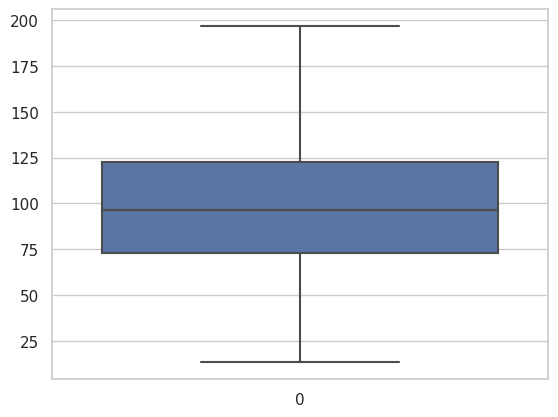

In [212]:
#sns.boxplot(x) #needed to be windsorized
ndf['avg_salary'] = windsorize(ndf['avg_salary'])
sns.boxplot(ndf['avg_salary'])

<Axes: >

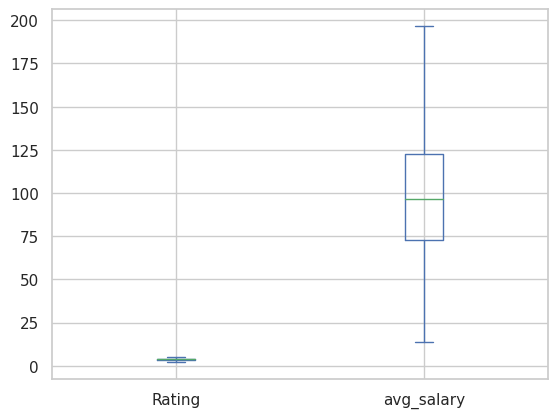

In [213]:
ndf.plot.box()

In [214]:
## Test-train split
#from sklearn.model_selection import train_test_split
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=50)
#TSS = np.sum( (y_test - y_train.mean())**2 )
#N_test = len(y_test)

2. Use a linear model to regress avg_salary on Sector. Which sectors have the highest predicted wages? What is the  R2  and RMSE on the test set?

In [215]:
ndf['Sector'].unique()

array(['Aerospace & Defense', 'Health Care', 'Business Services',
       'Oil, Gas, Energy & Utilities', 'Real Estate', 'Finance',
       'Information Technology', 'Retail', 'Biotech & Pharmaceuticals',
       'Media', 'Insurance', 'Transportation & Logistics',
       'Telecommunications', 'Manufacturing', 'Mining & Metals',
       'Government', 'Education', 'Agriculture & Forestry',
       'Travel & Tourism', 'Non-Profit',
       'Arts, Entertainment & Recreation',
       'Construction, Repair & Maintenance', 'Accounting & Legal',
       'Consumer Services'], dtype=object)

In [216]:
X = ndf['Sector']
y = ndf['avg_salary']

X_onehot = pd.get_dummies(X, columns='Sector', drop_first=True)
X_onehot.head()

,Aerospace & Defense,Agriculture & Forestry,"Arts, Entertainment & Recreation",Biotech & Pharmaceuticals,Business Services,"Construction, Repair & Maintenance",Consumer Services,Education,Finance,Government,...,Manufacturing,Media,Mining & Metals,Non-Profit,"Oil, Gas, Energy & Utilities",Real Estate,Retail,Telecommunications,Transportation & Logistics,Travel & Tourism
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
4,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [217]:
y.head()

0     72.0
1     87.5
2     85.0
3     76.5
4    114.5
Name: avg_salary, dtype: float64

In [218]:
#Actual data for avg_salary by Sector
#ChatGPT
# Group by 'Sector' and calculate the mean for each group
avg_salary_by_sector = ndf.groupby('Sector')['avg_salary'].mean().reset_index()

# Sort the results by average salary in descending order
avg_salary_by_sector = avg_salary_by_sector.sort_values(by='avg_salary', ascending=False)

# Display the sectors with the highest average salaries
print(avg_salary_by_sector)


                                Sector  avg_salary
15                               Media  116.666667
0                   Accounting & Legal  113.500000
4            Biotech & Pharmaceuticals  111.767857
12              Information Technology  111.595506
19                         Real Estate  104.750000
16                     Mining & Metals  104.000000
13                           Insurance  103.452899
21                  Telecommunications  102.333333
8                            Education  100.739130
7                    Consumer Services   99.875000
20                              Retail   99.666667
22          Transportation & Logistics   99.312500
1                  Aerospace & Defense   99.060000
9                              Finance   97.369048
5                    Business Services   97.280928
14                       Manufacturing   84.044118
2               Agriculture & Forestry   80.500000
18        Oil, Gas, Energy & Utilities   80.464286
10                          Gov

In [219]:
X_train, X_test, y_train, y_test = train_test_split(X_onehot,y,test_size=.2,random_state=100)   # Same linear regression as before
X_train.head()

,Aerospace & Defense,Agriculture & Forestry,"Arts, Entertainment & Recreation",Biotech & Pharmaceuticals,Business Services,"Construction, Repair & Maintenance",Consumer Services,Education,Finance,Government,...,Manufacturing,Media,Mining & Metals,Non-Profit,"Oil, Gas, Energy & Utilities",Real Estate,Retail,Telecommunications,Transportation & Logistics,Travel & Tourism
368,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
649,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
45,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
706,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
380,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [220]:
reg = LinearRegression().fit(X_train, y_train) # Fit the linear model
print(reg.intercept_) # Intercept value
print(reg.coef_) # Regression coefficients
print(reg.score(X_test, y_test)) # R squared measure

113.49999999999903
[-1.45555556e+01 -8.52651283e-14 -6.50000000e+01 -2.05789474e+00
 -1.77774390e+01 -8.70000000e+01 -1.36250000e+01 -1.17105263e+01
 -1.73333333e+01 -3.64500000e+01 -4.54038462e+01 -1.09854015e+00
 -1.29386792e+01 -3.62954545e+01  3.16666667e+00 -6.50000000e+00
 -3.87857143e+01 -3.27307692e+01 -8.75000000e+00 -1.57916667e+01
 -1.11666667e+01 -1.77500000e+01 -3.90000000e+01]
0.11991908886146807


In [221]:
N_test = len(y_test)
y_hat = reg.predict(X_test)

r2 = r2_score(y_test, y_hat)
print(r2)

0.11991908886146807


In [222]:

SSE_lm = np.sum( (y_test-y_hat)**2 )
MSE_lm = SSE_lm/N_test
RMSE_lm = (SSE_lm/N_test)**(1/2)
R2_lm = 1 - SSE_lm/TSS
print(RMSE_lm)

36.101617439835294


The sectors with the predicted wages are: Media, Accounting & Legal,         Biotech & Pharmaceuticals, Information Technology, & Real Estate.
The R^2 is .16 and the RMSE is 36.1  on the test set, which are quite poor scores. Based on this model, one might be better off just using the mean to predict the average salary.

<Axes: xlabel='Rating', ylabel='avg_salary'>

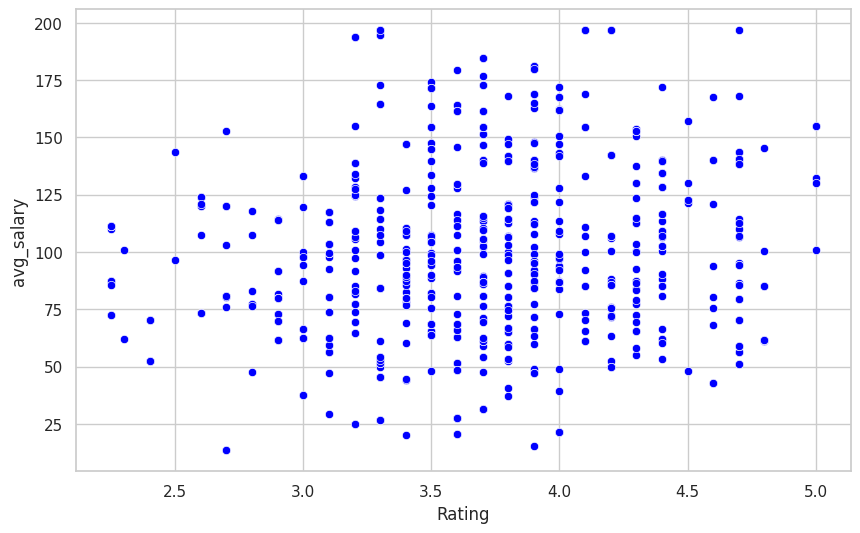

In [223]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Rating', y='avg_salary', data=ndf, color='blue')

There doesn't seem to be a strong relationship between these two variables. There is a lot more clumping in the center, but not a strong linear relationship.

In [224]:
X = ndf['Rating']
y = ndf['avg_salary']

In [225]:
X.head()

0    3.8
1    3.4
2    4.8
3    3.8
4    2.9
Name: Rating, dtype: float64

In [226]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=.2,random_state=100)
X_train.head()
X_train = X_train.values.reshape(-1, 1) #ChatGPT
X_test = X_test.values.reshape(-1, 1)

In [227]:
reg = LinearRegression().fit(X_train, y_train) # Fit the linear model
print(reg.intercept_) # Intercept value
print(reg.coef_) # Regression coefficients
print(reg.score(X_test, y_test)) # R squared measure

N_test = len(y_test)
y_hat = reg.predict(X_test)
TSS = np.sum( (y_test - y_train.mean())**2 )
RSS = np.sum( (y_test - y_hat)**2)

r2_val = r2_score(y_test, y_hat)
print('R^2 Value: ' + str(r2_val))     # It is negative. Maybe some error in sklearn, supposed to be close to 0.

SSE_lm = np.sum( (y_test-y_hat)**2 )
MSE_lm = SSE_lm/N_test
RMSE_lm = (SSE_lm/N_test)**(1/2)
R2_lm = 1 - SSE_lm/TSS
print(RMSE_lm)

r2_new = 1-(TSS/RSS)
print("Alternative Equation For R^2 = " + str(r2_new))   # Using R^2 = 1-TSS/RSS

65.06478239573369
[9.27746713]
0.011413459165798057
R^2 Value: 0.011413459165798057
38.26244390093574
Alternative Equation For R^2 = -0.014380147001137988


Higher rates do not necessarily predict a higher salary according to this model. There is either no or little correlation with these two variables. The R^2 is negative which means that there is clearly something wrong with the data. Maybe a machine error? I'm quite unsure...

In [228]:
ndf['Rating'].max()

5.0

In [238]:
#ndf['Rating'] = ndf[ndf['Rating'] == 5
avg_rating = ndf.mean()
ndf['Rounded'] = ndf['Rating'].round()


rX2 = ndf['Rounded']
ry2 = ndf['avg_salary']

rating_onehot = pd.get_dummies(rX2, columns=ndf['Rating'])
rating_onehot.head()  # Looks good

<ipython-input-238-be482a69b71f>:2: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  avg_rating = ndf.mean()


,2.0,3.0,4.0,5.0
0,0,0,1,0
1,0,1,0,0
2,0,0,0,1
3,0,0,1,0
4,0,1,0,0


In [239]:
X2_train, X2_test, y2_train, y2_test = train_test_split(rating_onehot,ry2,test_size=.2,random_state=100)   # Same linear regression as before
X2_train.head()

# Linear regression on categorical variables

reg = LinearRegression().fit(X2_train, y2_train) # Fit the linear model
print(reg.intercept_) # Intercept value
print(reg.coef_) # Regression coefficients
print(reg.score(X2_test, y2_test)) # R squared measure

N_test = len(y2_test)


TSS = np.sum( (y2_test - y2_train.mean())**2 )

y_hat = reg.predict(X2_test)

RSS = np.sum( (y2_test - y_hat)**2)

SSE_lm = np.sum( (y_test-y_hat)**2 )
MSE_lm = SSE_lm/N_test
RMSE_lm = (SSE_lm/N_test)**(1/2)
R2_lm = 1 - SSE_lm/TSS
print(RMSE_lm)

#r2_new = 1 - (RSS/TSS)    # Using alternative formula R^2 = 1-RSS/TSS
#print(r2_new)

468706270758185.4
[-4.68706271e+14 -4.68706271e+14 -4.68706271e+14 -4.68706271e+14]
-0.02522471966317097
38.965019121146355


The categorical version had a higher R^2 value, only -0.02 compared to -0.001 and a slighly higher RMSE of 38.965 compared to 38.5, but overall the models are not great for predicting a relationship between rating and average salary.

In [241]:
# Creating a variable that interacts secotr and rating. Ex: Retail below avg, Retail above avg
ndf['sector_rate'] = ndf['Sector'] + ndf['Rounded'].astype(str)
ndf.head()

,Rating,Size,Sector,avg_salary,job_state,Rounded,sector_rate
0,3.8,501 to 1000 employees,Aerospace & Defense,72.0,NM,4.0,Aerospace & Defense4.0
1,3.4,10000+ employees,Health Care,87.5,MD,3.0,Health Care3.0
2,4.8,501 to 1000 employees,Business Services,85.0,FL,5.0,Business Services5.0
3,3.8,1001 to 5000 employees,"Oil, Gas, Energy & Utilities",76.5,WA,4.0,"Oil, Gas, Energy & Utilities4.0"
4,2.9,51 to 200 employees,Business Services,114.5,NY,3.0,Business Services3.0


In [242]:
rX3 = ndf['sector_rate']
ry3 = ndf['avg_salary']

rating_onehot2 = pd.get_dummies(rX3, columns=ndf['sector_rate'])
rating_onehot2.head()  # Looks good

,Accounting & Legal4.0,Aerospace & Defense3.0,Aerospace & Defense4.0,Aerospace & Defense5.0,Agriculture & Forestry5.0,"Arts, Entertainment & Recreation4.0",Biotech & Pharmaceuticals2.0,Biotech & Pharmaceuticals3.0,Biotech & Pharmaceuticals4.0,Biotech & Pharmaceuticals5.0,...,Real Estate3.0,Real Estate4.0,Retail2.0,Retail3.0,Retail4.0,Telecommunications3.0,Telecommunications4.0,Transportation & Logistics3.0,Transportation & Logistics4.0,Travel & Tourism4.0
0,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [244]:
X2_train, X2_test, y2_train, y2_test = train_test_split(rating_onehot2,ry3,test_size=.2,random_state=100)   # Same linear regression as before
X2_train.head()

# Linear regression on categorical variables

reg = LinearRegression().fit(X2_train, y2_train) # Fit the linear model
print(reg.intercept_) # Intercept value
print(reg.coef_) # Regression coefficients
print(reg.score(X2_test, y2_test)) # R squared measure

N_test = len(y2_test)


TSS = np.sum( (y2_test - y2_train.mean())**2 )

y_hat = reg.predict(X2_test)

RSS = np.sum( (y2_test - y_hat)**2)

SSE_lm = np.sum( (y_test-y_hat)**2 )
MSE_lm = SSE_lm/N_test
RMSE_lm = (SSE_lm/N_test)**(1/2)
R2_lm = 1 - SSE_lm/TSS
print(RMSE_lm)

r2_new = 1 - (RSS/TSS)    # Using alternative formula R^2 = 1-RSS/TSS
print(r2_new)

-1519607987133162.0
[ 1.51960799e+15  1.51960799e+15  1.51960799e+15  1.51960799e+15
 -1.00762882e+15  1.51960799e+15  1.51960799e+15  1.51960799e+15
  1.51960799e+15  1.51960799e+15  1.51960799e+15  1.51960799e+15
  1.51960799e+15  1.51960799e+15  1.51960799e+15  1.51960799e+15
  1.51960799e+15  1.51960799e+15  1.51960799e+15  1.51960799e+15
  1.51960799e+15  1.51960799e+15  1.51960799e+15  1.51960799e+15
  1.51960799e+15  1.51960799e+15  1.51960799e+15  1.51960799e+15
  1.51960799e+15  1.51960799e+15  1.51960799e+15  1.51960799e+15
  1.51960799e+15  1.51960799e+15  1.51960799e+15  1.51960799e+15
  4.03808594e-01  1.51960799e+15  1.51960799e+15  1.51960799e+15
  1.51960799e+15  1.51960799e+15  1.51960799e+15  1.51960799e+15
  1.51960799e+15  1.51960799e+15  1.51960799e+15  1.51960799e+15
  1.51960799e+15  1.51960799e+15  1.51960799e+15]
-4.022005548206558e+25
244054428074606.84
-4.0107651358019695e+25


Looking at these data, the r^2 is very negative, which I am unsure as to why. The r^2 in part 2 is better than in this model, as well as the RMSE value. All the sectors have the same coefficient value, which doesn't seem to make much sense, but it might the model is very bad. Therefore, I am unable to determine the sector-ratings with the highest salaries.

In [247]:
ndf = ndf.drop('sector_rate',axis=1)

In [257]:

ndf = ndf[ndf['Size'] != 'Unknown']
ndf['Size'].unique()
size_map = {'1 to 50 employees': 1, '51 to 200 employees': 2, '201 to 500 employees': 3
              , '501 to 1000 employees':4, '1001 to 5000 employees':5, '5001 to 10000 employees':6,
              '10000+ employees':7}
ndf['Size'] = ndf['Size'].replace(size_map)
ndf.head()


<ipython-input-257-1186a9cac8e6>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ndf['Size'] = ndf['Size'].replace(size_map)


,Rating,Size,Sector,avg_salary,job_state,Rounded
0,3.8,4,Aerospace & Defense,72.0,NM,4.0
1,3.4,7,Health Care,87.5,MD,3.0
2,4.8,4,Business Services,85.0,FL,5.0
3,3.8,5,"Oil, Gas, Energy & Utilities",76.5,WA,4.0
4,2.9,2,Business Services,114.5,NY,3.0


In [258]:
rX4 = ndf.drop(('avg_salary'), axis=1)
ry4 = ndf['avg_salary']

In [261]:
from sklearn.linear_model import LinearRegression # Import linear regression model

vars = ['Rating','Size','Sector','avg_salary', 'job_state','Rounded'] # This is a list of variables to use

X = ndf.loc[:,vars] # Construct data matrix
print(X.head()) # Peek at data

reg = LinearRegression().fit(X, ry4) # Fit the linear model
print(reg.intercept_) # Intercept value
print(reg.coef_) # Regression coefficients
print(reg.score(X, y)) # R squared measure

   Rating  Size                        Sector  avg_salary job_state  Rounded
0     3.8     4           Aerospace & Defense        72.0        NM      4.0
1     3.4     7                   Health Care        87.5        MD      3.0
2     4.8     4             Business Services        85.0        FL      5.0
3     3.8     5  Oil, Gas, Energy & Utilities        76.5        WA      4.0
4     2.9     2             Business Services       114.5        NY      3.0


ValueError: ignored

In [259]:
X2_train, X2_test, y2_train, y2_test = train_test_split(rX4,ry4,test_size=.2,random_state=100)   # Same linear regression as before
X2_train.head()

# Linear regression on categorical variables

reg = LinearRegression().fit(X2_train, y2_train) # Fit the linear model
print(reg.intercept_) # Intercept value
print(reg.coef_) # Regression coefficients
print(reg.score(X2_test, y2_test)) # R squared measure

N_test = len(y2_test)


TSS = np.sum( (y2_test - y2_train.mean())**2 )

y_hat = reg.predict(X2_test)

RSS = np.sum( (y2_test - y_hat)**2)

SSE_lm = np.sum( (y_test-y_hat)**2 )
MSE_lm = SSE_lm/N_test
RMSE_lm = (SSE_lm/N_test)**(1/2)
R2_lm = 1 - SSE_lm/TSS
print(RMSE_lm)

r2_new = 1 - (RSS/TSS)    # Using alternative formula R^2 = 1-RSS/TSS
print(r2_new)

ValueError: ignored

I'm not sure what the best method of doing this problem is.

In [263]:
# I am

KeyError: ignored

In [262]:
vars = ['Rating', 'Sector','avg_salary', 'sector_rate'] # This is a list of variables to use

X5 = ndf.loc[:,vars] # Construct data matrix
print(X.head()) # Peek at data

y5 = ndf['avg_salary']

KeyError: ignored

In [ ]:
X2_train, X2_test, y2_train, y2_test = train_test_split(X5,y5,test_size=.2,random_state=100)
X2_train.head()

In [ ]:
## Decision Trees sample code:
from sklearn import tree
N_test = len(y_test)
model = tree.DecisionTreeRegressor(max_depth=6) # Fit the classifier
cart = model.fit(X_train, y_train)
tree.plot_tree(cart,filled=True)
plt.show()

## Make Predictions on the Test Set
y_hat_cart = cart.predict(X_test)
residuals_cart = y_test - y_hat_cart


## True versus predicted plot:
plt.scatter(x=y_hat_cart,y=y_test)
plt.title('Predicted vs. Actual Values')
plt.show()


## Metrics:
SSE_cart = np.sum( (y_test-y_hat_cart)**2 )
MSE_cart = (1/N_test)*np.sum( (y_test-y_hat_cart)**2 )
RMSE_cart = (SSE_cart/N_test)**(1/2)
R2_cart = 1 - SSE_cart/TSS
print(R2_cart)

**Q3.** This a question purely on categorical prediction. The data for this happen to be gathered in 1987 in Indonesia, and concern contraceptive method choice. The questions and data-gathering assumptions reflect the culture and attitudes of that time and place, but provide a good example of a categorical prediction problem on an important topic (family planning and maternal health The variables in the data are:

    - Wife's age (numerical)
    - Wife's education (categorical) 1=low, 2, 3, 4=high
    - Husband's education (categorical) 1=low, 2, 3, 4=high
    - Number of children ever born (numerical)
    - Wife's religion (binary) 0=Non-Islam, 1=Islam
    - Wife's now working? (binary) 0=Yes, 1=No
    - Husband's occupation (categorical) 1, 2, 3, 4
    - Standard-of-living index (categorical) 1=low, 2, 3, 4=high
    - Media exposure (binary) 0=Good, 1=Not good
    - Contraceptive method used (class attribute) 1=No-use, 2=Long-term, 3=Short-termhort-term

  1. Load the `contraceptiveMethodChoice.csv` data. Tabulate the `method` variable (i.e. `.value_counts()`). 1 corresponds to `No Contraception`, 3 corresponds to `Short Term` (e.g. condoms, birth control pills), and 2 corresponds to `Long Term` (e.g. IUD, sterilization). Cross tabulate `method` and `numberChildren`. Do couples that use birth control tend to have more children than those who don't?
  2. Split the sample into ~80% training data and ~20% testing data.
  3. We are now going to make a mistake. Train a regression tree to predict the contraceptive method using the other variables in the data, not a classification tree. Look at the terminal nodes in the tree: What values do they take? Does that make sense? Explain clearly what has gone wrong here.
  4. Instead of regression, use a classification tree to predict contraceptive method using the other variables in the data. How does it look different from the previous tree? What variables does the algorithm use? In broad terms, which groups of people are most likely to use each method of contraception?
  5. Compute a confusion matrix for your classification tree on the test set (Hint: There are now three categories instead of two, so the cross tabulation will be a $3 \times 3$ matrix instead of $2 \times 2$.). Compute the Accuracy of your model overall, and the Accuracy for predicting each contraceptive method.
  7. Why can't you use a linear probability model to do this exercise? Explain clearly in words.

**Q4.** This is a question where we use regression and regression trees. The outcome is whether a defendant is held pre-trial in the Virginia justice system. We would like to understand how that outcome is predicted by characteristics of the defendant, particularly race. Let's be very careful/clear: We aren't saying anyone *should* be held without bond or asserting that people with different demographic variables *should* be more likely to be held, but instead trying to predict whether people with different characteristics *are empirically more likely* to be held without bond, given the available information. This is the first step we would take in investigating whether a system is fair, or how large the disparities are: Does it treat people with similar observable characteristics similarly, or not? We are going to look at a common question: Are Black defendants treated differently from white or Asian ones? (There are Native American defendants, but there are 11 in total, which is such a small number of observations that is difficult to clearly say anything about how this group is treated relative to the others.)

The variables in the data are:

  - `held_wo_bail`: Whether a defendant is held without bail before trial (Boolean logical)
  - `race`, `sex`: Categorical demographic variables
  - `is_poor`: Whether the defendant is classified as indigent
  - `prior_F`, `prior_M`: The number of prior felony and misdemeanor arrests
  - `case_type`: A categorical variable indicating a misdemeanor `M` or felony `F` or infraction `I` or special case `S`
  - `age`: Defendant's age
  - `bond`, `bond_NA`, `bond_type`: The amount of any bond, whether it is missing, and the type
  - `sentence`, `sentence_NA`, `sentence_type`: The length of any sentence, whether it is missing, and the type

1. Load the `pretrial_data.csv` data. Notice that there are `nan`s, but the data are relatively clean. Because there are `.nan`s among variables you won't use, you'll want to narrow down your analysis to the relevant variables before dropping or imputing missing values.
2. Create a dummy variable indicating that the defendant is Black.
3. Regress `held` on `Black`. What is the slope coefficient Interpret the coefficient on the Black dummy variable: How much more likely is a black person to be held without bail? What is the $R^2$ of the model?
4. Before doing this question, please think for a few minutes about how to make the process of running these regressions as efficient as possible, before jumping into writing code. Repeat part 2, for the following specifications, keeping track of the coefficient on the Black dummy variable each time:
      - `held` on `Black` and `sex`
      - `held` on `Black` and `sex` and `is_poor`
      - `held` on `Black` and `sex` and `is_poor` and `prior_F`
      - `held` on `Black` and `sex` and `is_poor` and `prior_F` and `case_type`
What happens to the coefficient on the Black dummy variable as you include more regressors/features/controls in the regression? Explain your findings.
5. Suppose we don't want to see just `Black` and `sex`, but `Black` interacted with `sex`: Are Black men and Black women treated systemically differently from the rest of the population? Implement this in a regression, and explain your findings.
6. Imagine someone argued we should use these kinds of models to help a judge or magistrate make bail decisions (you could obviously go back and make this kind of model for the bond and sentence variables, then deploy it on new cases to predict what their bond and sentence values would be). What concerns would you have? Do you think society should be using data-driven and automated tools like that? Explain your concerns clearly.

**Q5.** This is a math question to review the derivation of the OLS estimator (but only if you are into that kind of thing!). We are going to do it slightly differently from what we did in class, though. We will use a linear predictor and minimize the Sum of Squared Errors, just as in class. But, we are going to de-mean $X$ first, creating another variable $z_i = x_i - \bar{x}$ where
$$
\bar{x} = \dfrac{1}{N} \sum_{i=1}^N x_i,
$$
so the model is $\hat{y}_i = a + b z_i$ and the `SSE` is
$$
\text{SSE}(a,b) = \sum_{i=1}^N (y_i - a - bz_i)^2.
$$

  1. Take partial derivatives of the `SSE` with respect to $a$ and $b$. You should get

\begin{eqnarray*}
\sum_{i=1}^N -2(y_i - a- bz_i) &=& 0 \\
\sum_{i=1}^N -2(y_i - a - bz_i)z_i &=& 0.
\end{eqnarray*}

  2. Solve for the solutions to the above equations. Big hint: $\bar{z} = 0$, since we subtracted the mean of $x$ from $x$ to get $z$. You should get

\begin{eqnarray*}
a^* &=& \bar{y} \\
b^* &=& \dfrac{\sum_{i=1}^N(y_i - \bar{y})z_i}{\sum_{i=1}^N z_i^2}.
\end{eqnarray*}

  3. Substitute $z_i = x_i - \bar{x}$ back into the above equations. You should get
  
\begin{eqnarray*}
a^* &=& \bar{y} \\
b^* &=& \dfrac{\sum_{i=1}^N(y_i - \bar{y})(x_i-\bar{x})}{\sum_{i=1}^N (x_i-\bar{x})^2},
\end{eqnarray*}

which can be written in terms of sample covariance and sample variance as:

\begin{eqnarray*}
a^* &=& \bar{y} \\
b^* &=& \dfrac{\text{cov}(x,y)}{\text{var}(x)}.
\end{eqnarray*}

This is typically the preferred way of expressing the OLS coefficients.

4. When will $b^*$ be large or small, depending on the relationship between $x$ and $y$ and the amount of "noise"/variance in $x$? What does $a^*$ represent?
5. Suppose you have measurement error in $x$ which artificially inflates its variance (e.g. bad data cleaning). What happens to the $b^*$ coefficient? How will affect your ability to predict? (This phenomenon is called **attenuation**.)
6. Let's return to the question of *outliers*. With your formula for the OLS coefficients $(a^*,b^*)$, explain what happens if you significantly increase a single value of the outcome/target/response variable $y_i$ or one of the predictor/explanatory/covariate variables $x_i$. If values for some extreme observations are exerting significant influence over the regression coefficients, will the model perform well on for more average observations?